<a href="https://colab.research.google.com/github/saleem-saleem/Sales-Prediction/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np      # To use np.arrays
import pandas as pd     # To use dataframes
from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 34.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from google.colab import files
uploaded = files.upload()

Saving strain.csv to strain.csv


In [3]:
import io
df = pd.read_csv(io.StringIO(uploaded['strain.csv'].decode('utf-8')))

In [4]:
from google.colab import files
uploaded = files.upload()

Saving features.csv to features.csv


In [5]:
df1 = pd.read_csv(io.StringIO(uploaded['features.csv'].decode('utf-8')))

In [6]:
from google.colab import files
uploaded = files.upload()

Saving stores.csv to stores.csv


In [7]:
df2= pd.read_csv(io.StringIO(uploaded['stores.csv'].decode('utf-8')))

In [8]:
df2.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [9]:
# merging 3 different sets
df3 = df.merge(df1, on=['Store', 'Date'], how='inner').merge(df2, on=['Store'], how='inner')
df3.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [10]:
df3.drop(['IsHoliday_y'], axis=1,inplace=True) # removing dublicated column
df3.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) # rename the column
df3.head() # last ready data set

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [11]:
df3.shape

(421570, 16)

In [12]:
store_dept_table = pd.pivot_table(df3, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [13]:
df3.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,55,2010-04-23,11082.83,False,64.84,2.795,NaN,NaN,NaN,NaN,NaN,210.439123,7.808,A,151315
2384,1,24,2010-09-24,3526.46,False,80.94,2.624,NaN,NaN,NaN,NaN,NaN,211.597225,7.787,A,151315
6048,1,38,2011-09-16,73226.90,False,79.94,3.526,NaN,NaN,NaN,NaN,NaN,216.041053,7.962,A,151315
6049,1,40,2011-09-16,58226.24,False,79.94,3.526,NaN,NaN,NaN,NaN,NaN,216.041053,7.962,A,151315
6051,1,42,2011-09-16,8950.75,False,79.94,3.526,NaN,NaN,NaN,NaN,NaN,216.041053,7.962,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,58,2012-04-06,1915.00,False,49.73,3.996,13450.45,NaN,26.59,3363.54,3962.01,190.685171,8.567,B,118221
419598,45,59,2012-04-06,270.51,False,49.73,3.996,13450.45,NaN,26.59,3363.54,3962.01,190.685171,8.567,B,118221
419603,45,74,2012-04-06,10574.47,False,49.73,3.996,13450.45,NaN,26.59,3363.54,3962.01,190.685171,8.567,B,118221
419614,45,93,2012-04-06,2201.26,False,49.73,3.996,13450.45,NaN,26.59,3363.54,3962.01,190.685171,8.567,B,118221


In [14]:
df3 = df3.loc[df['Weekly_Sales'] > 0]

In [15]:
df3['Date'].head(5).append(df3['Date'].tail(5))

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

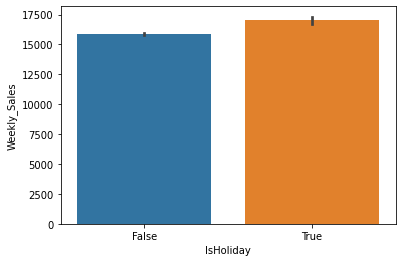

In [16]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df3)

In [17]:
df_holiday = df3.loc[df3['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [18]:
df_not_holiday = df3.loc[df3['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

In [19]:
# Mahanavami dates in train set
df3.loc[(df3['Date'] == '2010-02-12')|(df3['Date'] == '2011-02-11')|(df3['Date'] == '2012-02-10'),'Maha_Navami'] = True
df3.loc[(df3['Date'] != '2010-02-12')&(df3['Date'] != '2011-02-11')&(df3['Date'] != '2012-02-10'),'Maha_Navami'] = False

In [20]:
# Eid day dates in train set
df3.loc[(df3['Date'] == '2010-09-10')|(df3['Date'] == '2011-09-09')|(df3['Date'] == '2012-09-07'),'Eid_Day'] = True
df3.loc[(df3['Date'] != '2010-09-10')&(df3['Date'] != '2011-09-09')&(df3['Date'] != '2012-09-07'),'Eid_Day'] = False

In [21]:
# diwali dates in train set
df3.loc[(df3['Date'] == '2010-11-26')|(df3['Date'] == '2011-11-25'),'Diwali'] = True
df3.loc[(df3['Date'] != '2010-11-26')&(df3['Date'] != '2011-11-25'),'Diwali'] = False

In [22]:
#ChristmasNewyear dates in train set
df3.loc[(df3['Date'] == '2010-12-31')|(df3['Date'] == '2011-12-30'),'ChristmasNewYear'] = True
df3.loc[(df3['Date'] != '2010-12-31')&(df3['Date'] != '2011-12-30'),'ChristmasNewYear'] = False

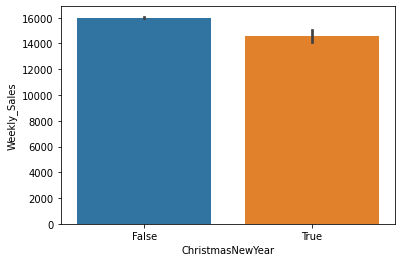

In [23]:
sns.barplot(x='ChristmasNewYear', y='Weekly_Sales', data=df3) 

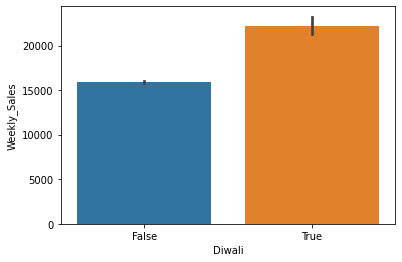

In [24]:
sns.barplot(x='Diwali', y='Weekly_Sales', data=df3) 

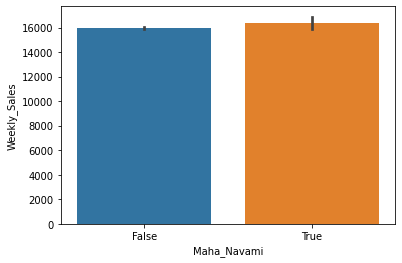

In [25]:
sns.barplot(x='Maha_Navami', y='Weekly_Sales', data=df3) 

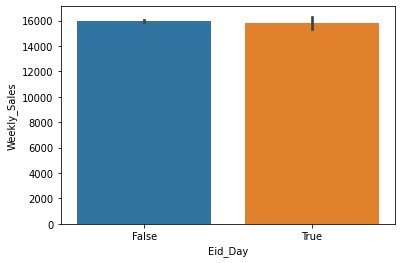

In [26]:

sns.barplot(x='Eid_Day', y='Weekly_Sales', data=df3) 

In [27]:
df3.groupby(['ChristmasNewYear','Type'])['Weekly_Sales'].mean() 

ChristmasNewYear  Type
False             A       20126.759995
                  B       12246.122963
                  C        9537.672918
True              A       18241.637284
                  B       11401.469414
                  C        7963.228980
Name: Weekly_Sales, dtype: float64

In [28]:
df3.groupby(['Eid_Day','Type'])['Weekly_Sales'].mean()  

Eid_Day  Type
False    A       20104.011153
         B       12241.843145
         C        9508.025576
True     A       19918.701824
         B       11870.635392
         C        9864.685427
Name: Weekly_Sales, dtype: float64

In [30]:
df3.groupby(['Diwali','Type'])['Weekly_Sales'].mean()  

Diwali  Type
False   A       19995.621354
        B       12141.677243
        C        9514.475766
True    A       27370.728296
        B       18645.123862
        C        9588.752884
Name: Weekly_Sales, dtype: float64

In [31]:
df3.groupby(['Maha_Navami','Type'])['Weekly_Sales'].mean()  

Maha_Navami  Type
False        A       20089.227685
             B       12230.533326
             C        9501.641876
True         A       20603.690832
             B       12401.451371
             C       10169.638138
Name: Weekly_Sales, dtype: float64

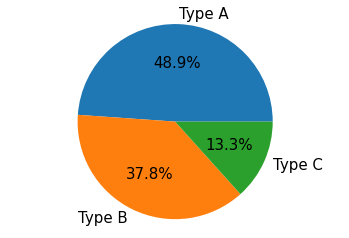

In [32]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [33]:
df3.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15905.030290
True     17018.243806
Name: Weekly_Sales, dtype: float64

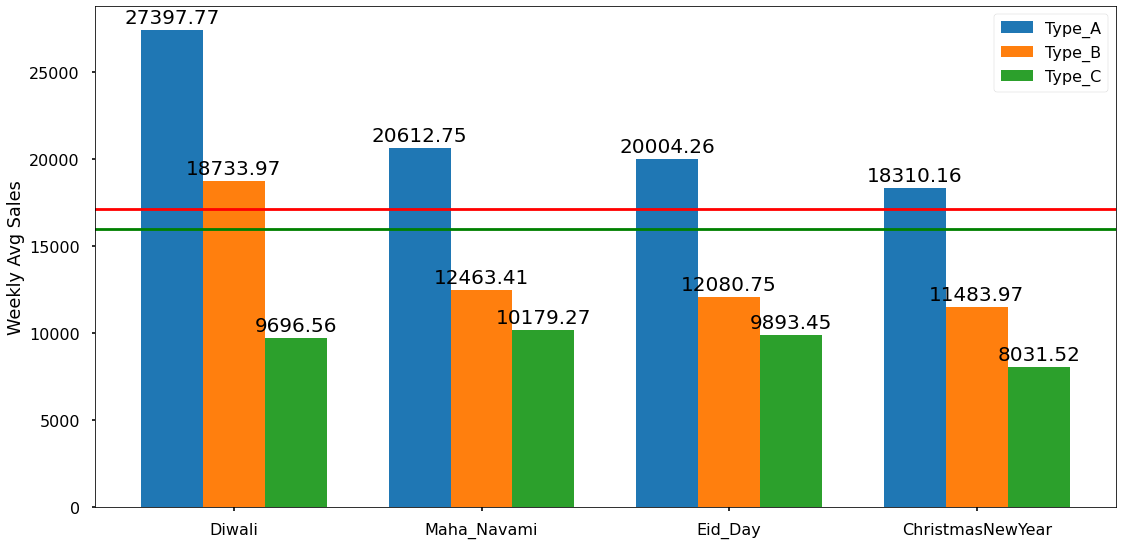

In [34]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Diwali', 'Maha_Navami', 'Eid_Day', 'ChristmasNewYear']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [35]:
df3.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Maha_Navami,Eid_Day,Diwali,ChristmasNewYear
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


In [36]:
df2.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


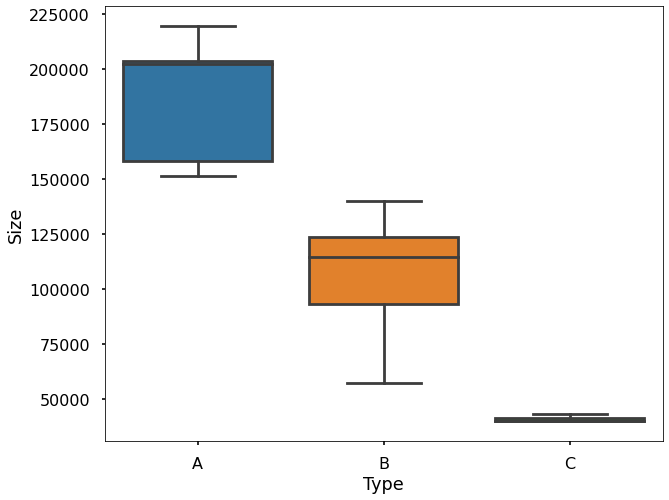

In [37]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df3, showfliers=False)

In [38]:
df3.isna().sum()

Store                    0
Dept                     0
Date                     0
Weekly_Sales             0
IsHoliday                0
Temperature              0
Fuel_Price               0
MarkDown1           269996
MarkDown2           309308
MarkDown3           283572
MarkDown4           285673
MarkDown5           269247
CPI                      0
Unemployment             0
Type                     0
Size                     0
Maha_Navami              0
Eid_Day                  0
Diwali                   0
ChristmasNewYear         0
dtype: int64

In [39]:
df3 = df3.fillna(0)

In [40]:
df3.isna().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday           0
Temperature         0
Fuel_Price          0
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
CPI                 0
Unemployment        0
Type                0
Size                0
Maha_Navami         0
Eid_Day             0
Diwali              0
ChristmasNewYear    0
dtype: int64

In [41]:
df3.describe() # to see weird statistical things

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.256751,15983.294754,60.081257,3.360673,2590.787686,879.876750,468.676410,1084.402252,1664.172190,171.210690,7.960115,136749.732787
std,12.787236,30.490155,22716.085058,18.460153,0.458546,6055.527230,5088.361835,5533.985755,3899.228238,4212.268396,39.163293,1.864048,60993.084568
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2080.000000,46.670000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.340000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20210.280000,74.290000,3.738000,2809.050000,2.400000,4.530000,425.462500,2169.340000,212.445487,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


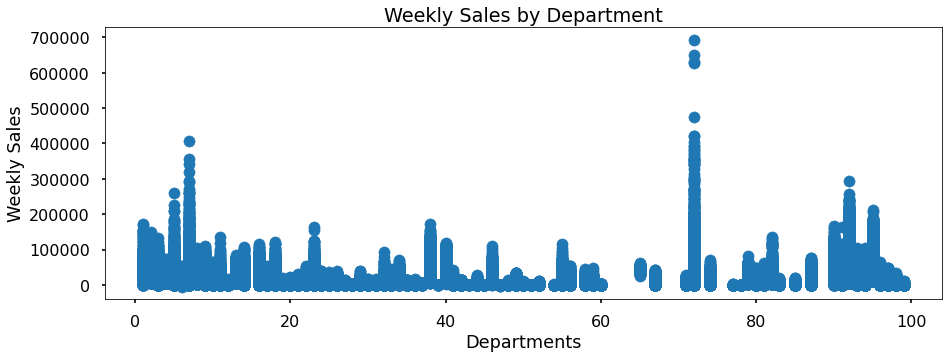

In [42]:
x = df3['Dept']
y = df3['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

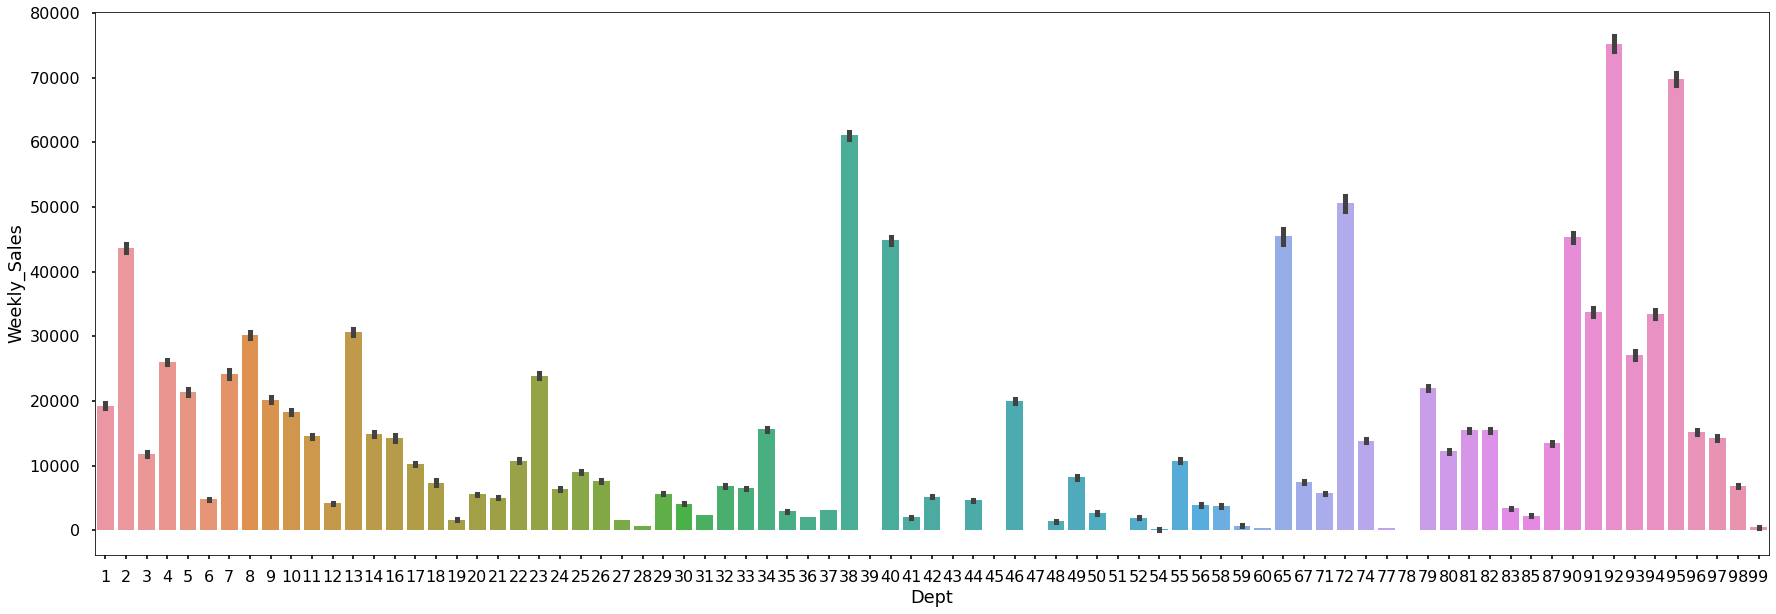

In [43]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df3)


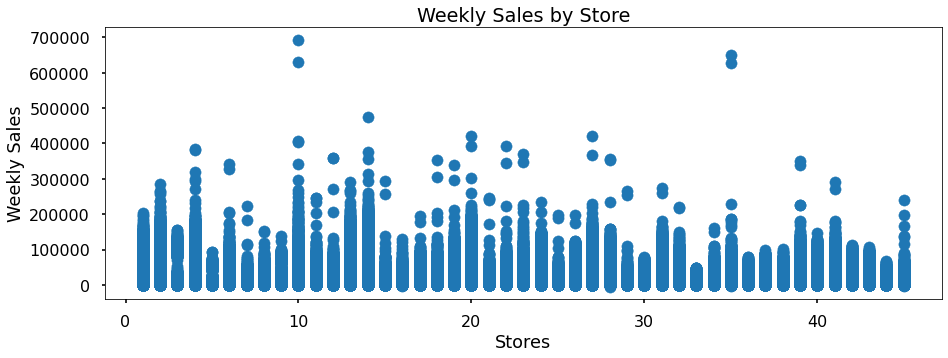

In [44]:
x = df3['Store']
y = df3['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

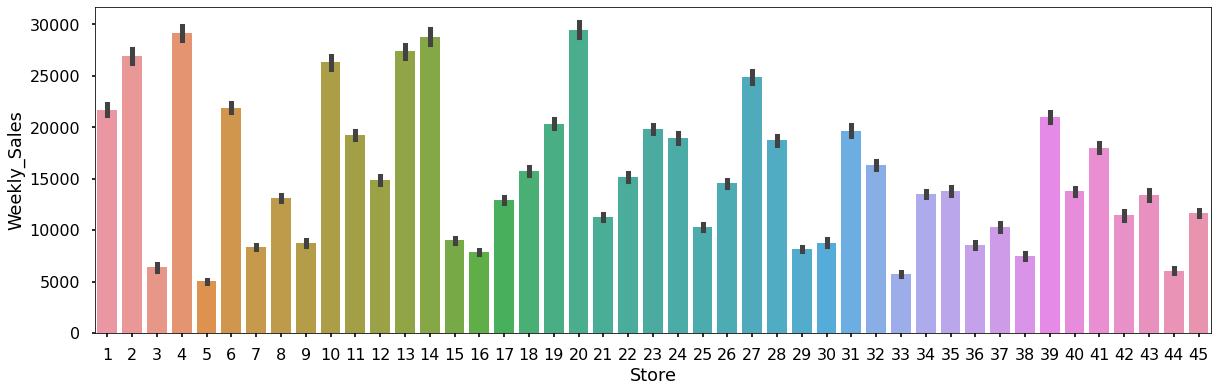

In [45]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df3)

In [46]:
df3["Date"] = pd.to_datetime(df3["Date"]) # convert to datetime
df3['week'] =df3['Date'].dt.week
df3['month'] =df3['Date'].dt.month 
df3['year'] =df3['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [47]:
df3.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales

month
1     14130.871544
2     16017.891179
3     15419.876501
4     15662.876378
5     15782.148145
6     16327.198533
7     15868.667861
8     16069.198345
9     15052.326412
10    15232.695505
11    17513.571664
12    19362.152606
Name: Weekly_Sales, dtype: float64

In [48]:
df3.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales

year
2010    16269.261046
2011    15955.714752
2012    15700.638622
Name: Weekly_Sales, dtype: float64

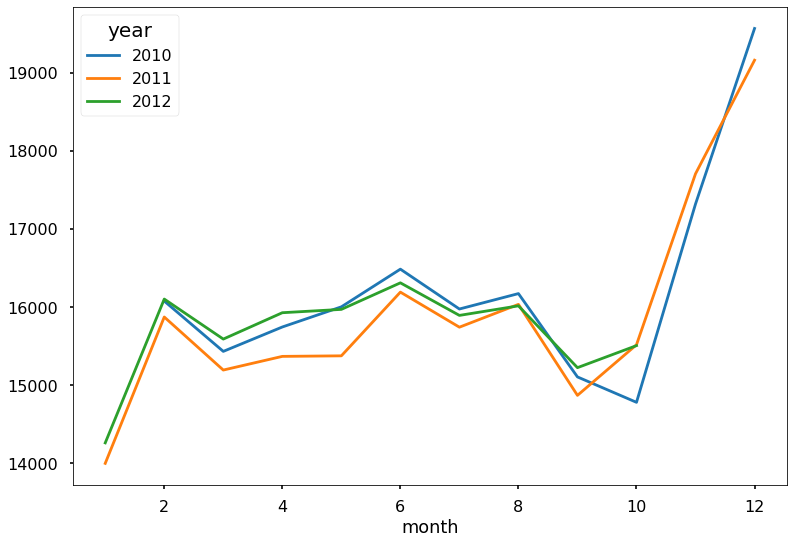

In [49]:
monthly_sales = pd.pivot_table(df3, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

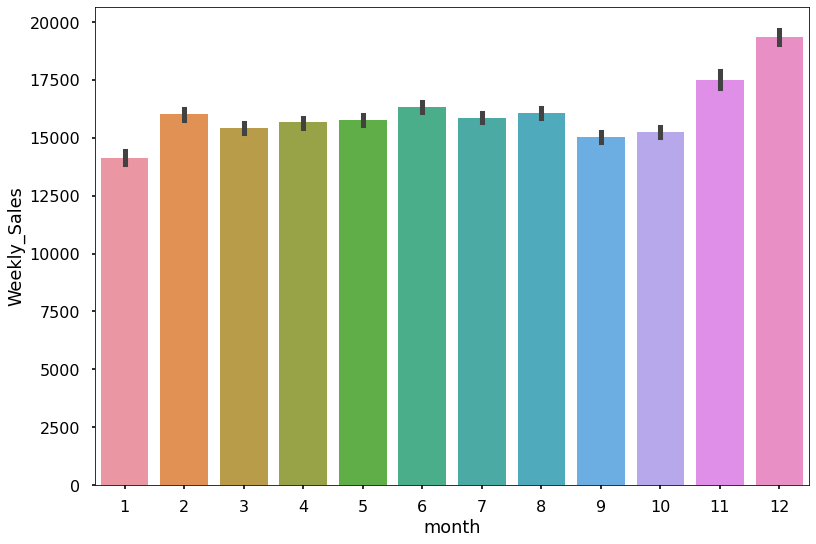

In [50]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df3)

In [51]:
df3.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26385.460052
47    22221.911774
50    20410.929107
49    18678.487882
22    16783.123292
Name: Weekly_Sales, dtype: float64

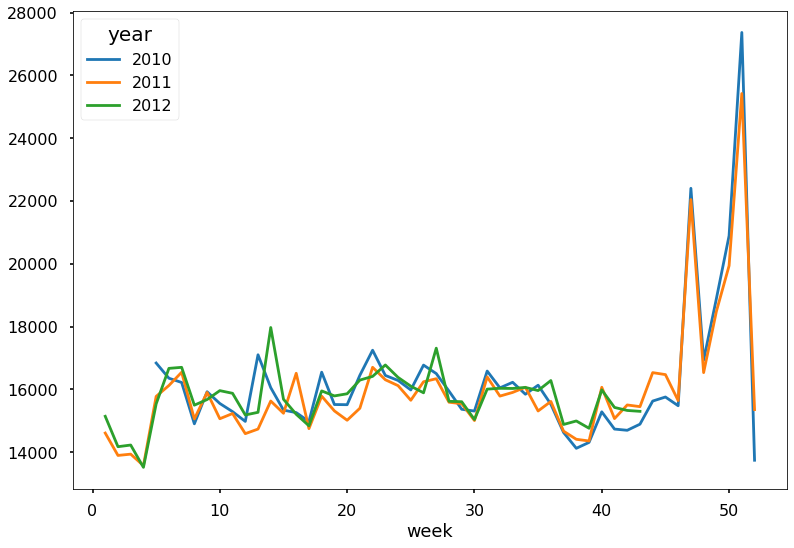

In [52]:
weekly_sales = pd.pivot_table(df3, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

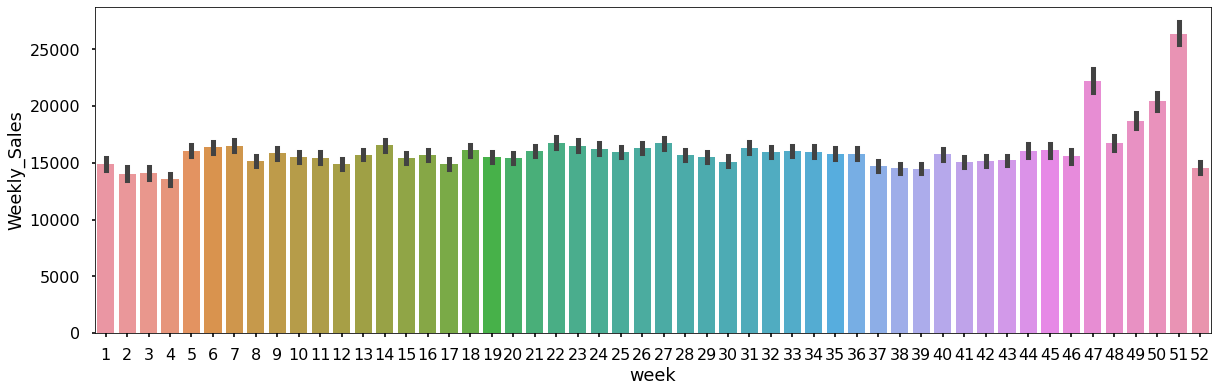

In [53]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df3)

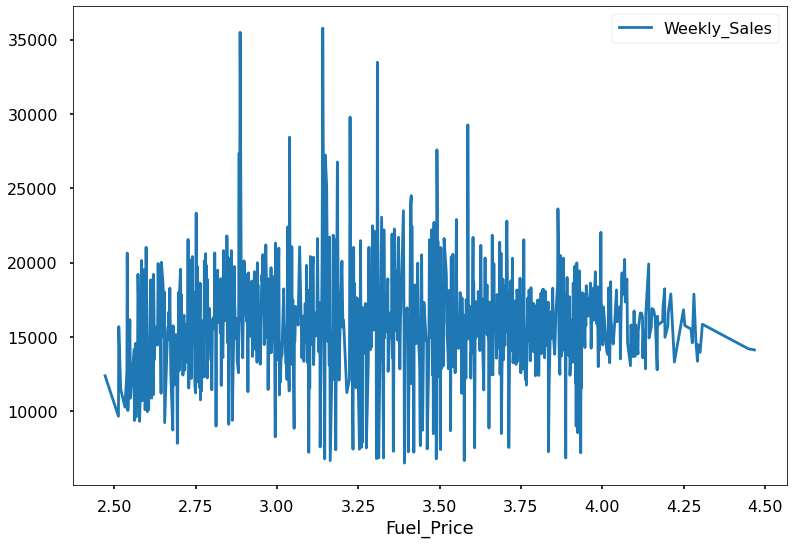

In [54]:
fuel_price = pd.pivot_table(df3, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

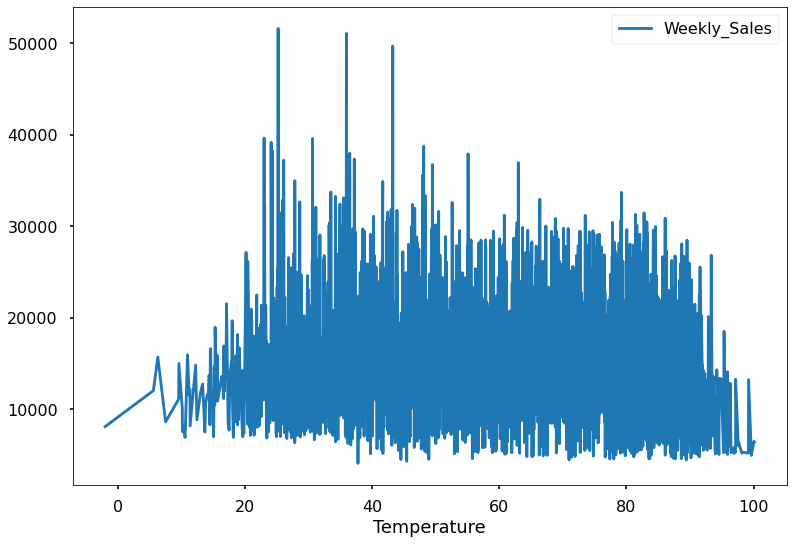

In [55]:
temp = pd.pivot_table(df3, values = "Weekly_Sales", index= "Temperature")
temp.plot()

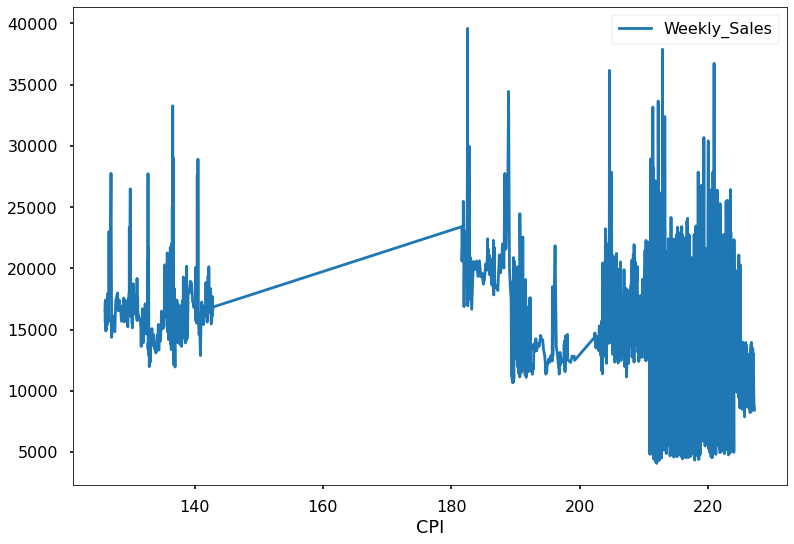

In [56]:
CPI = pd.pivot_table(df3, values = "Weekly_Sales", index= "CPI")
CPI.plot()

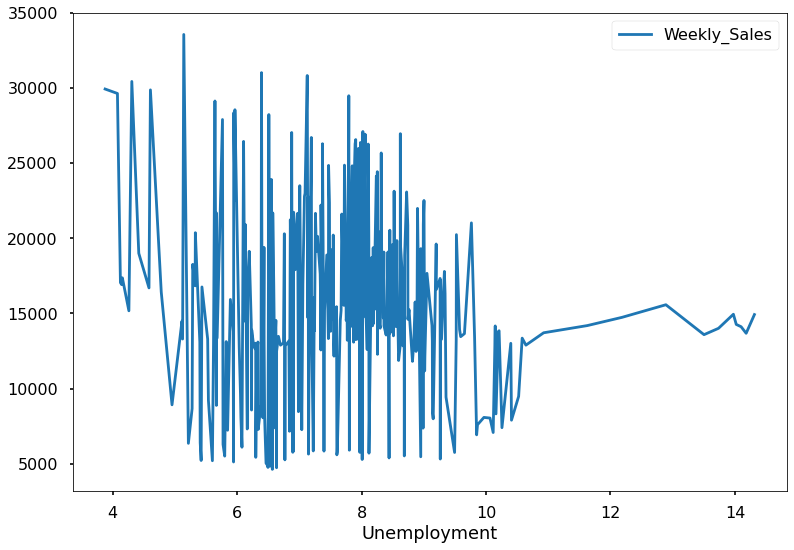

In [57]:
unemployment = pd.pivot_table(df3, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [58]:
df3.to_csv('clean_data.csv') 

In [59]:
pd.options.display.max_columns=100 # to see columns 

In [60]:
df = pd.read_csv('./clean_data.csv')

In [61]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [62]:
df['Date'] = pd.to_datetime(df['Date']) # changing datetime to divide if needs

In [63]:
df_encoded = df.copy() # to keep original dataframe taking copy of it
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)
df_encoded['Maha_Navami'] = df_encoded['Maha_Navami'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['Diwali'] = df_encoded['Diwali'].astype(bool).astype(int) # changing T,F to 0-1

In [64]:
df_encoded['Eid_Day'] = df_encoded['Eid_Day'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['ChristmasNewYear'] = df_encoded['ChristmasNewYear'].astype(bool).astype(int) # changing T,F to 0-1
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int) # changing T,F to 0-1
df_new = df_encoded.copy() # taking the copy of encoded df to keep it original

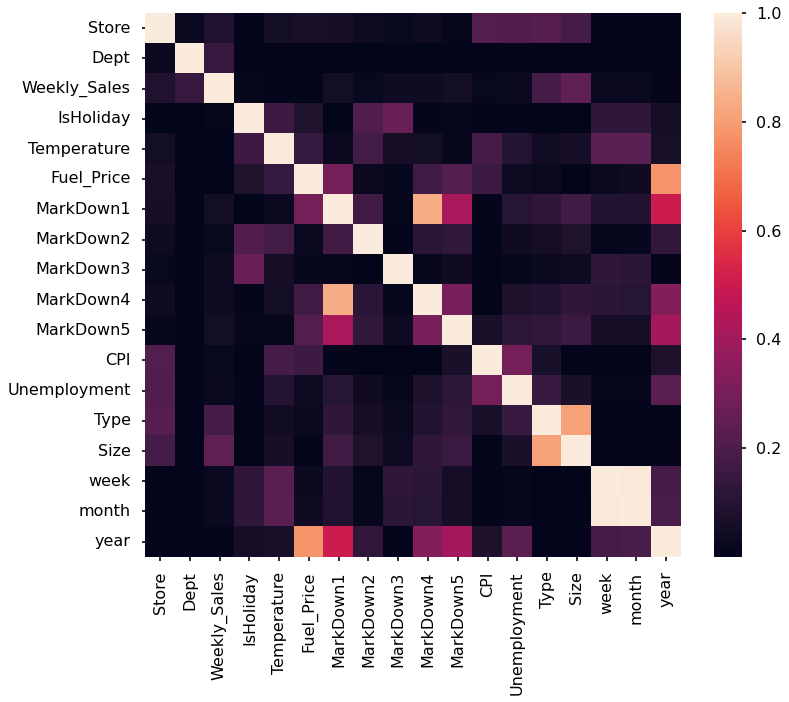

In [65]:
drop_col = ['Maha_Navami','Eid_Day','Diwali','ChristmasNewYear']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

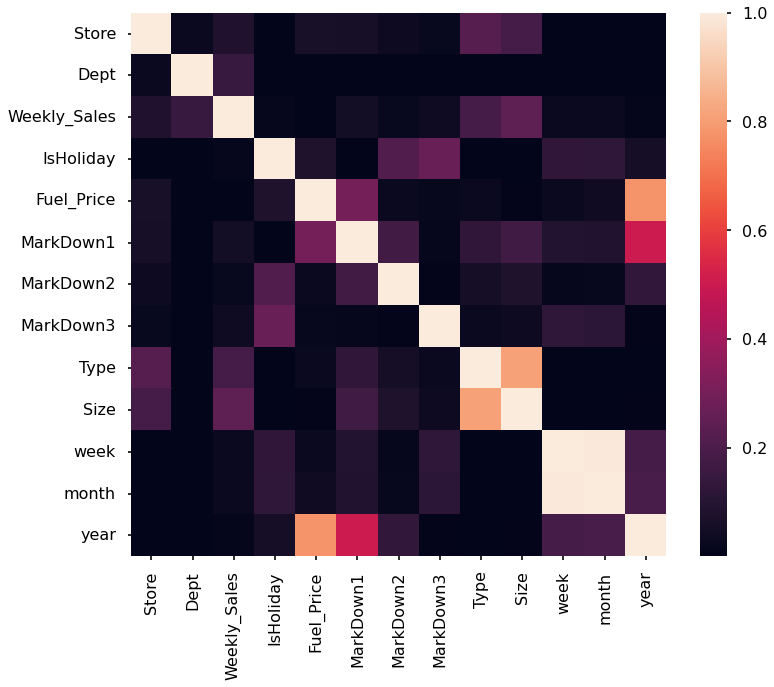

In [66]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

In [67]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date

In [68]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]
X = df_new[used_cols] # to keep train and test X values together
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [69]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [70]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)
wmae_test(y_test, y_pred_test)

5461.895473970006

Feature ranking:
1. feature 1 (0.726312)
2. feature 8 (0.123143)
3. feature 0 (0.057263)
4. feature 7 (0.030291)
5. feature 9 (0.021370)
6. feature 3 (0.018485)
7. feature 10 (0.008485)
8. feature 6 (0.005158)
9. feature 4 (0.003076)
10. feature 5 (0.002458)
11. feature 2 (0.002392)
12. feature 11 (0.001568)


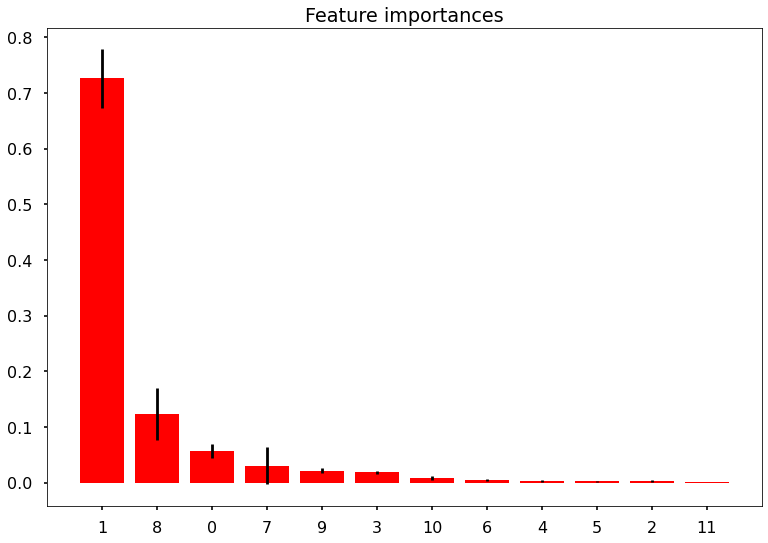

In [71]:
X = X.drop(['Date'], axis=1) #dropping date column from X
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [72]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

In [73]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)
wmae_test(y_test, y_pred_test)

5264.281773712625

In [74]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]
X_enc = df_encoded[used_cols1] # to get together train,test splits
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)
wmae_test(y_test_enc, y_pred_test_enc)

2560.7938771936033

Feature ranking:
1. feature 1 (0.744931)
2. feature 13 (0.072355)
3. feature 12 (0.044131)
4. feature 0 (0.030579)
5. feature 10 (0.029030)
6. feature 11 (0.017117)
7. feature 18 (0.012097)
8. feature 3 (0.011179)
9. feature 4 (0.010129)
10. feature 19 (0.005739)
11. feature 7 (0.004567)
12. feature 9 (0.004019)
13. feature 8 (0.003658)
14. feature 5 (0.003552)
15. feature 6 (0.002395)
16. feature 16 (0.001279)
17. feature 20 (0.001189)
18. feature 2 (0.000885)
19. feature 17 (0.000550)
20. feature 14 (0.000325)
21. feature 15 (0.000292)


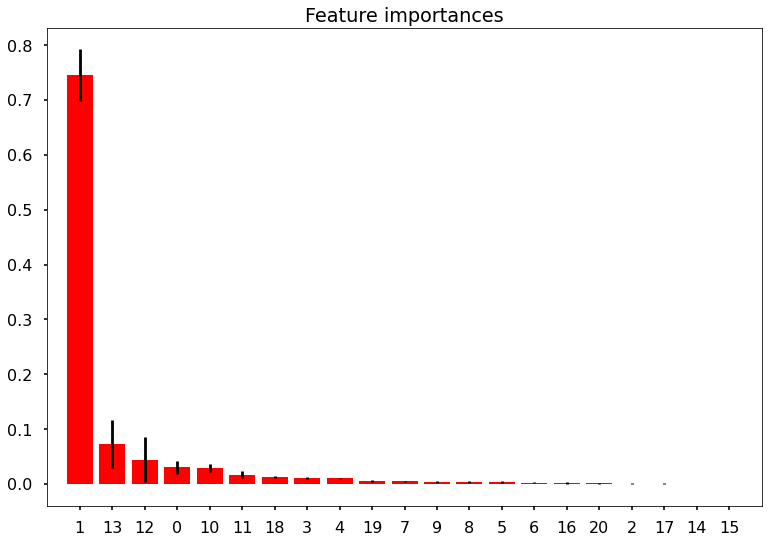

In [75]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Printing the feature ranking
print("Feature ranking:")

for f in range(X_enc.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [76]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [77]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)
pipe.score(X_test_enc1,y_test_enc1)

0.7455952929362011

In [78]:
wmae_test(y_test_enc1, y_pred_test_enc)

1842.5750714057644

In [79]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]
#modeling part
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)
pipe.score(X_test_enc2,y_test_enc2)

0.6988808662982587

In [80]:
wmae_test(y_test_enc2, y_pred_test_enc)

2151.6095352944862

In [81]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together
# writing results to df
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out divided holiday columns' , 
       'WMAE' : 5850}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out month column' , 
       'WMAE' : 5494}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data' , 
       'WMAE' : 2450}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection' , 
       'WMAE' : 1801}, ignore_index=True)
df_results = df_results.append({     
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection w/out month' , 
       'WMAE' : 2093}, ignore_index=True)
df_results

,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


In [82]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Maha_Navami,Eid_Day,Diwali,ChristmasNewYear,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [83]:
df["Date"] = pd.to_datetime(df["Date"]) #changing data to datetime for decomposing
df.set_index('Date', inplace=True) #seting date as index

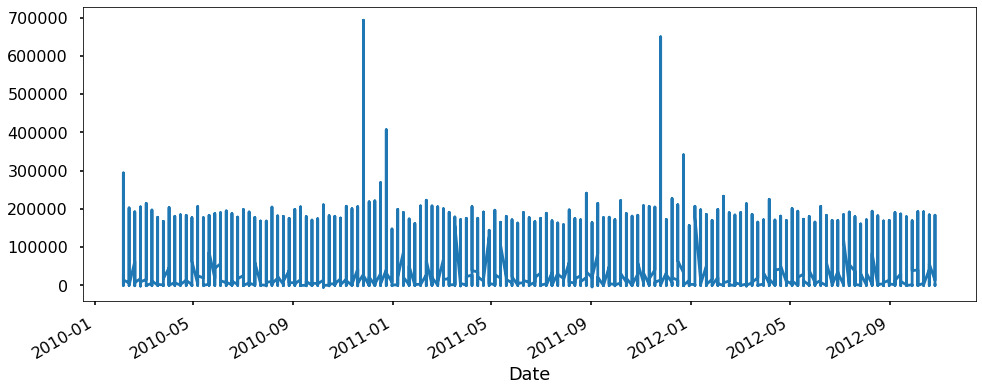

In [84]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

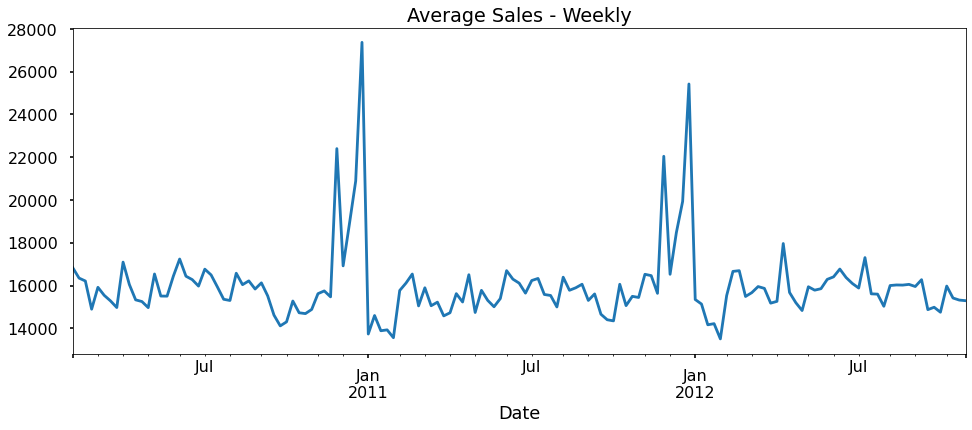

In [85]:
df_week = df.resample('W').mean() #resample data as weekly
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

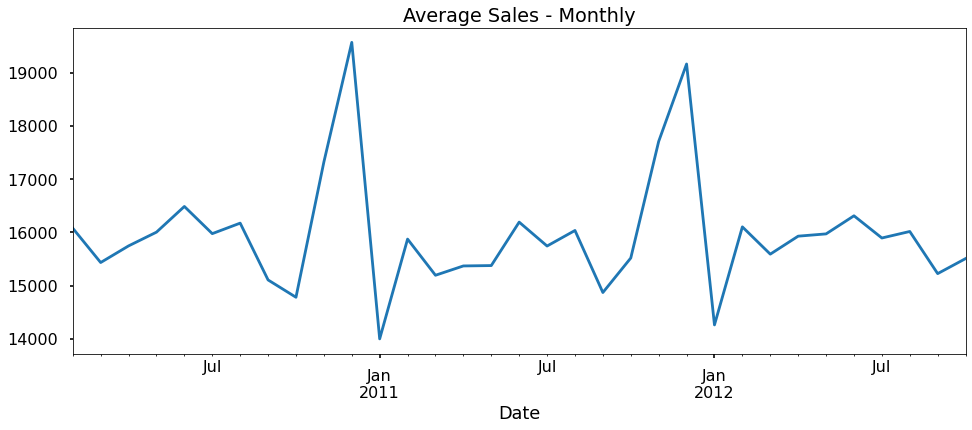

In [86]:
df_month = df.resample('MS').mean() # resampling as monthly
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

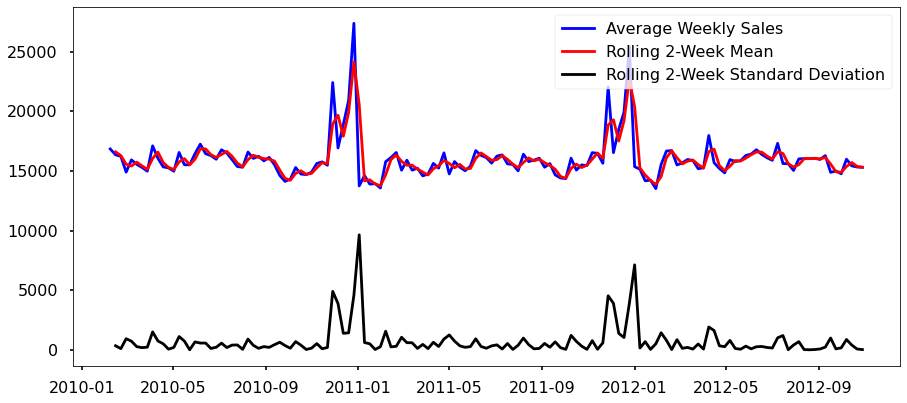

In [87]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [88]:
adfuller(df_week['Weekly_Sales'])

(-5.9120896178947975,
 2.624300556499276e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '10%': -2.578065326612056,
  '5%': -2.882721765644168},
 2262.0378211470756)

In [89]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


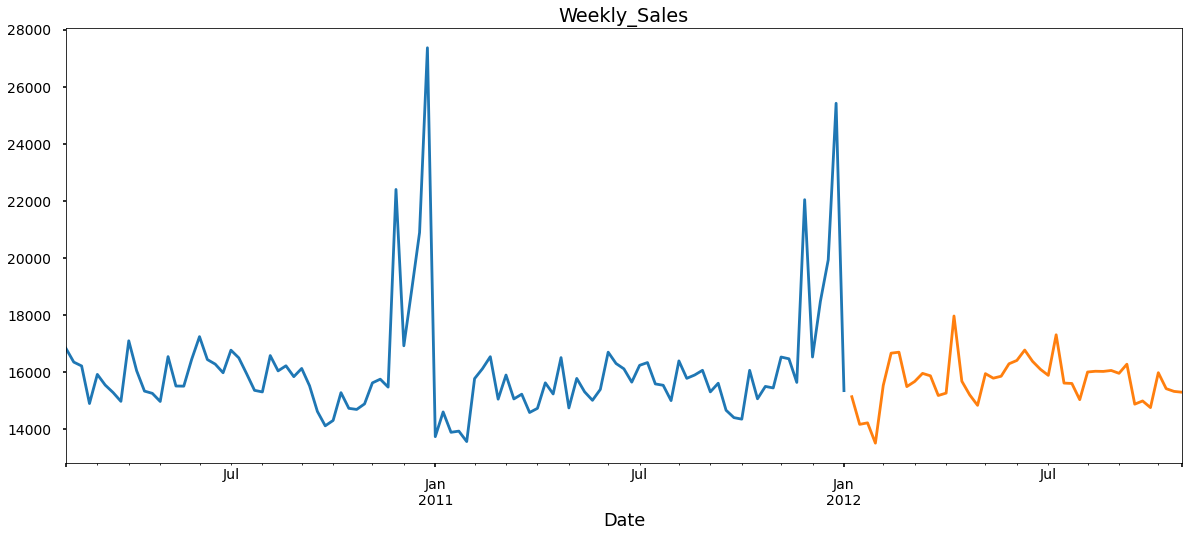

In [90]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

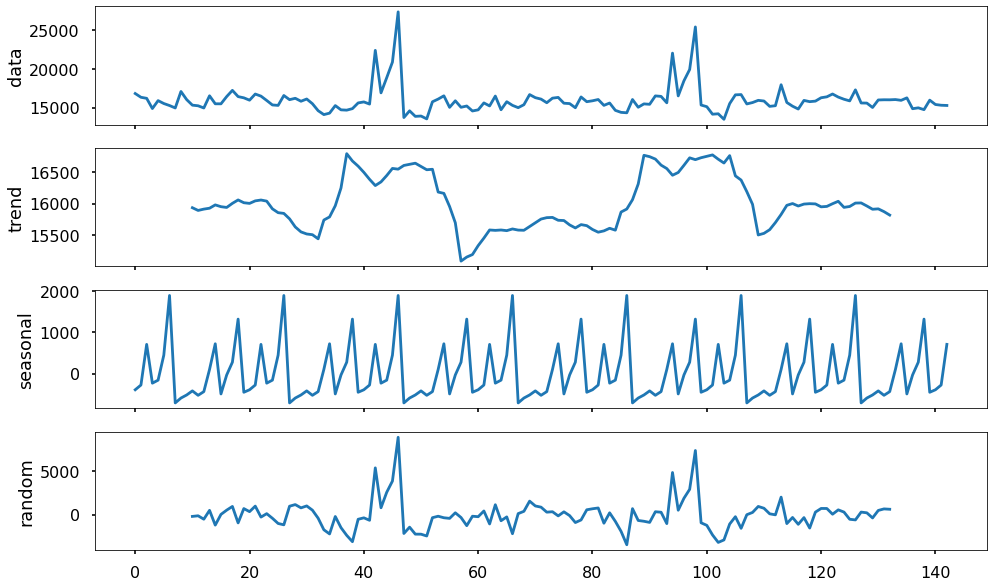

In [91]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

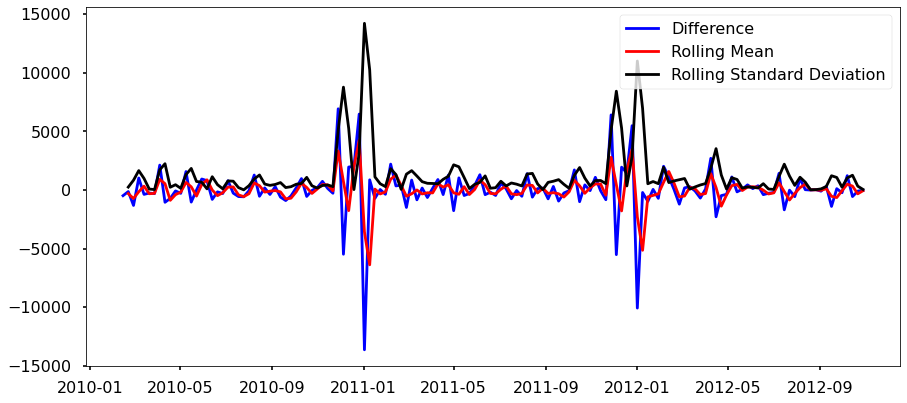

In [92]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

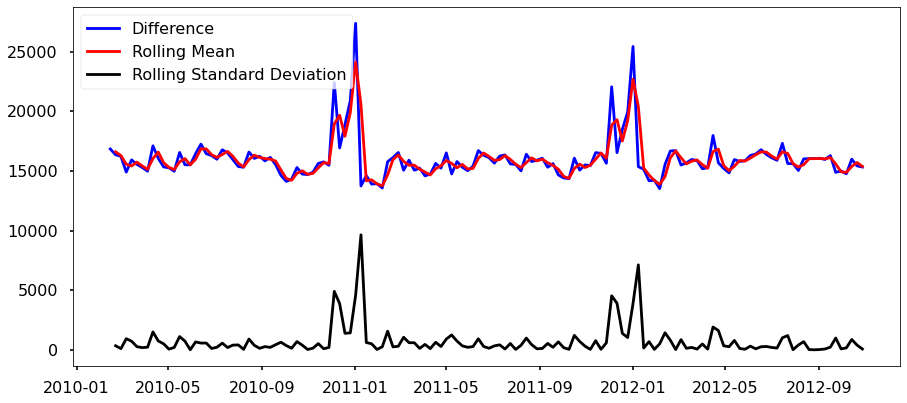

In [93]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

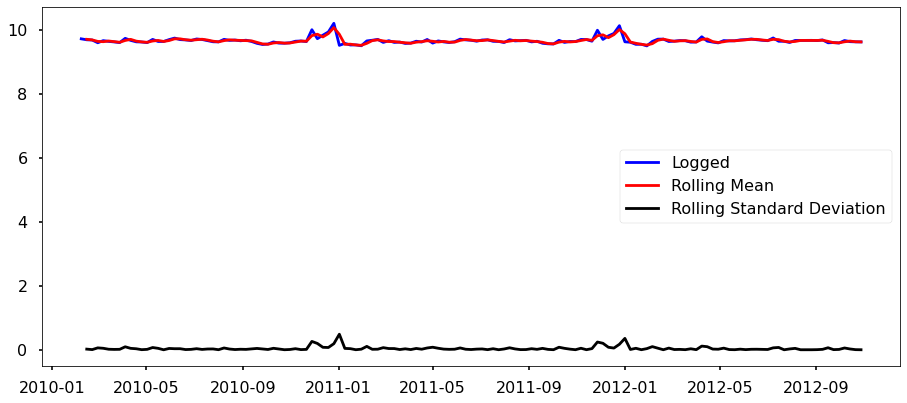

In [94]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [95]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1827.015, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.627, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.551, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.006, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.947, Time=0.19 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.225, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.189, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

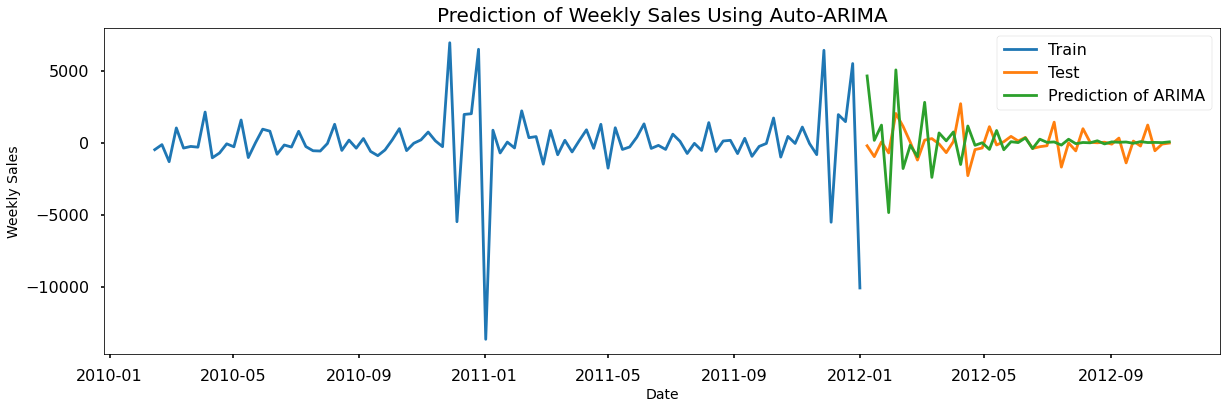

In [96]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()